# Tarea 1: Minería de Datos con datos sobre COVID-19

**Autor**: Diego Canales Vallejos

**Carrera**: Ingeniería Civil Telemática

**Asignatura**: Introducción a la Inteligencia Artificial (IIE575-1)

**Docente**: Dra. Millaray Curilem Saldias

**Departamento de Ingeniería Eléctrica**

**Universidad de La Frontera**

# Desarrollo

## Knowledge Discovery in Databases (KDD)

Para realizar el análisis de los datos de esta actividad se utilizará el procedimiento Knowledge Discovery in Databases (KDD). Este procedimiento consta de repetición de la aplicación de las siguientes etapas para encontrar e interpretar patrones en los datos.
1. **Abstracción del escenario:** Entender la problemática y tener contexto para de las posibles soluciones.
2. **Selección de datos:** Crear o seleccionar un dataset sobre cual se desea realizar el análisis.
3. **Preprocesamiento:** Limpieza de los datos. 
  - Remover el ruido o los datos outliers.
  - Obtener la información necesaria para modelar.
  - Utilizar estrategias para manejar datos faltantes.
4. **Transformación:** Transformaciones a los datos para mejorar el anáálisis.
  - Reduccióón de dimensionalidad.
  - Convertir valores numéricos a categóóricos o vicecersa.
5. **Elección de la tarea de Minería de Datos:**
  - Clasificación.
  - Regresión.
  - Clustering.
  - Otros.
6. **Elección algoritmo de Minería de Datos :**
  - Seleccionar el o los métodos utilizaddos para buscar patrones en los datos.
  - Decidir que modelos y que parámetros son los apropiados.
7. **Minería de datos**:
  - Buscar patrones de interés en una forma de presentación particular.
8. **Interpretacióón de los patrones minados.**
9. **Consolidar el conocimiento descubrido.**



![KDD](https://base-de-datos62.webnode.com.co/_files/200000010-c84f4c9490/450/Blank%20Diagram%20-%20Page%201.png)

In [ ]:
# LIBRERIAS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import numpy as np

## Selección de datos

**Reporte diario COVID-19**

El repositorio de base de datos a utilizar es del Center for Systems Science and Engineering (CSSE) de la Universidad Johns Hopkins,  Baltimore, Estados Unidos de Reporte diario COVID-19.

https://github.com/CSSEGISandData/COVID-19

Los datos son obtenidos desde diversas fuentes indicadas en la siguiente url.

https://github.com/CSSEGISandData/COVID-19/blob/master/README.md

Especificamente se utilizará el dataset del día 05-06-2020

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/05-06-2020.csv

**POBLACION POR PAIS**

https://worldpopulationreview.com/countries/

**DENSIDAD DE CAMAS POR PAIS**

https://www.cia.gov/library/publications/the-world-factbook/fields/360.html

**CLASIFICACIÓN POR INGRESOS SEGÚN BANCO MUNDIAL**

https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

### Importar datasets

In [ ]:
# IMPORTE DATOS REPORTE CONTAGIADOS COVID-19
path_reporte_covid19 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-05-2020.csv'
reporte_covid19 = pd.df = pd.read_csv(path_reporte_covid19)

# IMPORTE DATOS POBLACION POR PAIS
path_poblacion = 'https://raw.githubusercontent.com/DiegoCanales/IIE575-AI-T1/master/world_population_by_country.csv'
poblacion =  pd.read_csv(path_poblacion)

# IMPORTE DENSIDAD DE CAMAS POR PAIS
densidad_camas =  pd.read_html('https://www.cia.gov/library/publications/the-world-factbook/fields/360.html')
densidad_camas = densidad_camas[0]

# CLASIFICACION POR INGRESOS
incomes = pd.read_csv('https://raw.githubusercontent.com/DiegoCanales/IIE575-AI-T1/master/classifications_by_income.csv', sep=';')

Se importan los archivos CSV con Pandas biblioteca para el manejo de datos de Python.

Luego se realiza una exploración rápida de los datasets, esto es el tamaño de estos y los tipos de datos de las columnas.

### Dataset Reporte Infectados Covid-19

In [ ]:
print('dimensiones:'+str(reporte_covid19.shape))
print('tipo de datos')
print(reporte_covid19.dtypes)
reporte_covid19.head() # primeros 5 registros

dimensiones:(3209, 12)
tipo de datos
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
Combined_Key       object
dtype: object


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-06 02:32:31,34.223334,-82.461707,33,0,0,33,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-06 02:32:31,30.295065,-92.414197,136,10,0,126,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-06 02:32:31,37.767072,-75.632346,429,7,0,422,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-06 02:32:31,43.452658,-116.241552,713,19,0,694,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-06 02:32:31,41.330756,-94.471059,2,0,0,2,"Adair, Iowa, US"


### Dataset Población por País


In [ ]:
print('dimensiones:'+str(poblacion.shape))
print('tipo de datos')
print(poblacion.dtypes)
poblacion.head() # primeros 5 registros

dimensiones:(232, 7)
tipo de datos
Rank            int64
name           object
pop2020       float64
pop2019       float64
GrowthRate    float64
area          float64
Density       float64
dtype: object


,Rank,name,pop2020,pop2019,GrowthRate,area,Density
0,1,China,1439323.776,1433783.686,1.0039,9706961.0,147.7068
1,2,India,1380004.385,1366417.754,1.0099,3287590.0,415.6290
2,3,United States,331002.651,329064.917,1.0059,9372610.0,35.1092
3,4,Indonesia,273523.615,270625.568,1.0107,1904569.0,142.0928
4,5,Pakistan,220892.340,216565.318,1.0200,881912.0,245.5634


### Dataset Densidad de camas

In [ ]:
print('dimensiones:'+str(densidad_camas.shape))
print('tipo de datos')
print(densidad_camas.dtypes)
densidad_camas.head()

dimensiones:(184, 2)
tipo de datos
Country                 object
Hospital bed density    object
dtype: object


,Country,Hospital bed density
0,Afghanistan,"0.4 beds/1,000 population (2017)"
1,Albania,"2.9 beds/1,000 population (2013)"
2,Algeria,"1.9 beds/1,000 population (2015)"
3,Andorra,"2.5 beds/1,000 population (2009)"
4,Antigua and Barbuda,"2.9 beds/1,000 population (2017)"


### Datos clasificación por ingresos

In [ ]:
print('dimensiones:'+str(incomes.shape))
print('tipo de datos')
print(incomes.dtypes)

incomes.head()

dimensiones:(218, 4)
tipo de datos
GroupCode      object
GroupName      object
CountryCode    object
CountryName    object
dtype: object


,GroupCode,GroupName,CountryCode,CountryName
0,HIC,High income,ABW,Aruba
1,HIC,High income,AND,Andorra
2,HIC,High income,ARE,United Arab Emirates
3,HIC,High income,ATG,Antigua and Barbuda
4,HIC,High income,AUS,Australia


In [ ]:
print(incomes['GroupName'].unique())
print(incomes['GroupCode'].unique())

['High income' 'Low income' 'Lower middle income' 'Upper middle income']
['HIC' 'LIC' 'LMC' 'UMC']


## Preprocesamiento

- Se observa la cantidad de datos perdidos que tienen las columnas.
- Se eliminan los registros con ciertos datos perdidos.
- Se extrae el valor sobre densidad de camas del dataset, ya que se encuentra en un string.

### Limpieza de datos

In [ ]:
print('Datos perdidos dataset reporte covid19 camas \n'+str(reporte_covid19.isnull().sum()), end='\n\n')
print('Datos perdidos dataset poblacion \n'+str(poblacion.isnull().sum()), end='\n\n')
print('Datos perdidos dataset densidad camas \n'+str(densidad_camas.isnull().sum()), end='\n\n')

Datos perdidos dataset reporte covid19 camas 
FIPS              275
Admin2            272
Province_State    183
Country_Region      0
Last_Update         0
Lat                66
Long_              66
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64

Datos perdidos dataset poblacion 
Rank          0
name          0
pop2020       0
pop2019       0
GrowthRate    0
area          0
Density       0
dtype: int64

Datos perdidos dataset densidad camas 
Country                 0
Hospital bed density    4
dtype: int64



#### Reporte Casos COVID-19

In [ ]:
reporte_covid19 = reporte_covid19[reporte_covid19['Lat'].notna()]
reporte_covid19 = reporte_covid19[reporte_covid19['Long_'].notna()]

#### Población

In [ ]:
poblacion.rename(columns={'name':'país',
                          'pop2020':'población'}, 
                 inplace=True)

#### Densidad de camas

Los datos de las densidades de camas se encuentran en una columna con la siguiente cadena de texto: 0.5 beds/1,000 population, se extraerá el valor de las camas cada mil habitantes.

In [ ]:
# dividir el string de la columna Hospital bed density para obtener el valor
aux = densidad_camas['Hospital bed density'].str.split(expand=True)
# se guarda el valor de la densidad en la nueva columna 'Hospital bed density'
densidad_camas['Hospital bed density'] = aux[0]
del aux # elimina la variable aux
# cambia el tipo de la nueva columna a float
densidad_camas['Hospital bed density'] = densidad_camas['Hospital bed density'].astype(float)
# elimina las columnas sin datos
densidad_camas = densidad_camas.dropna()
# ordenar los datos según densidad de datos de manera descendiente
densidad_camas.sort_values(by='Hospital bed density', inplace=True, ascending=False)
# 10 paises con mayor densidad
densidad_camas.head(10)

,Country,Hospital bed density
66,Greenland,14.0
112,Monaco,13.8
90,"Korea, North",13.2
85,Japan,13.1
91,"Korea, South",12.3
14,Belarus,10.8
137,Russia,8.1
113,Mongolia,8.0
63,Germany,8.0
24,Bulgaria,7.5


#### Clasificación por ingresos

In [ ]:
incomes.head()

,GroupCode,GroupName,CountryCode,CountryName
0,HIC,High income,ABW,Aruba
1,HIC,High income,AND,Andorra
2,HIC,High income,ARE,United Arab Emirates
3,HIC,High income,ATG,Antigua and Barbuda
4,HIC,High income,AUS,Australia


En el dataset los países tienen las siguientes clasificaciones:

In [ ]:
incomes['GroupName'].unique()

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

Se cambiarán las etiquetas por las categorías siguientes

In [ ]:
classmap = {
    'High income': 4,
    'Upper middle income': 3,
    'Lower middle income': 2,
    'Low income': 1,
    
}
incomes['GroupName'] = incomes['GroupName'].map(classmap)

Se eliminarán las columnas innecesarias `GroupCode` y `CountryCode`

In [ ]:
incomes = incomes.drop(['GroupCode','CountryCode'], axis = 1)
incomes.head()

,GroupName,CountryName
0,4,Aruba
1,4,Andorra
2,4,United Arab Emirates
3,4,Antigua and Barbuda
4,4,Australia


### Visualización de datos

- Se visualizan de forma gráfica los datasets despúes de la limpieza de datos.

#### Reporte Casos COVID-19

In [ ]:
m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=2)

for i in range(0, len(reporte_covid19)):
    folium.Circle(
        location=[reporte_covid19.iloc[i]['Lat'], reporte_covid19.iloc[i]['Long_']],
        color='crimson', fill='crimson',
        tooltip =   '<li><bold>Country : '+str(reporte_covid19.iloc[i]['Country_Region'])+
                    '<li><bold>Province : '+str(reporte_covid19.iloc[i]['Province_State'])+
                    '<li><bold>Confirmed : '+str(reporte_covid19.iloc[i]['Confirmed'])+        
                    '<li><bold>Confirmed : '+str(reporte_covid19.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(reporte_covid19.iloc[i]['Deaths']),
        radius=int(reporte_covid19.iloc[i]['Confirmed'])*5).add_to(m)
    
m

#### Población

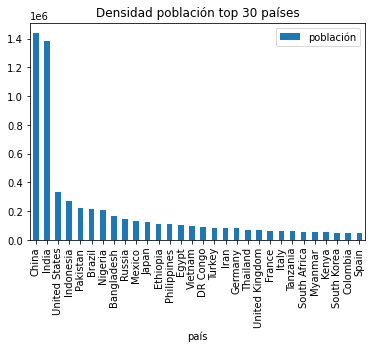

In [ ]:
poblacion.sort_values(by='población', inplace=True, ascending=False)
top = 30
poblacion.head(top).plot.bar(x='país', y='población', rot=90, title='Densidad población top '+str(top)+' países')
plt.show(block=True)

#### Densidad de camas

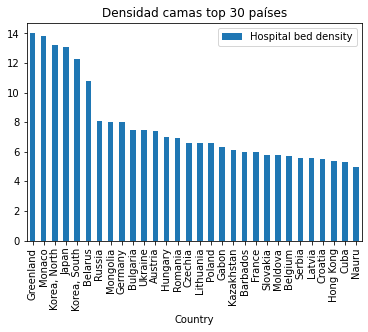

In [ ]:
top = 30
densidad_camas.head(top).plot.bar(x='Country', y='Hospital bed density', rot=90, title='Densidad camas top '+str(top)+' países')
plt.show(block=True)

#### Clasficación por ingresos

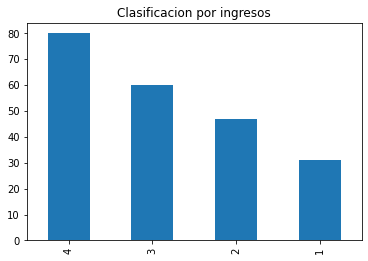

In [ ]:
incomes['GroupName'].value_counts().plot.bar(title='Clasificacion por ingresos')
plt.show(block=True);

## Transformación

Se ajustan nuevamente los dataset para realizar la unión de los tres.

### Agrupar datos
Se agruparán los datos del dataset reportes COVID-19 en por país debido a que algunos países (US, Canadá, Francia, entre otros) tienen datos de casos por provincia.

In [ ]:
reporte_covid19 = reporte_covid19.drop(['FIPS','Admin2','Province_State',
                      'Last_Update', 'Combined_Key', 'Lat', 'Long_'], axis = 1)

reporte_covid19 = reporte_covid19.groupby(by='Country_Region', as_index=False).sum()

reporte_covid19.loc[reporte_covid19['Country_Region'] == 'US', ['Country_Region']] = 'United States'

In [ ]:
reporte_covid19.head(10)

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,3224,95,421,2708
1,Albania,820,31,570,219
2,Algeria,4838,470,2067,2301
3,Andorra,751,46,514,191
4,Angola,36,2,11,23
5,Antigua and Barbuda,25,3,16,6
6,Argentina,5020,264,1472,3284
7,Armenia,2619,40,1111,1468
8,Australia,6875,97,5975,803
9,Austria,15650,606,13462,1582


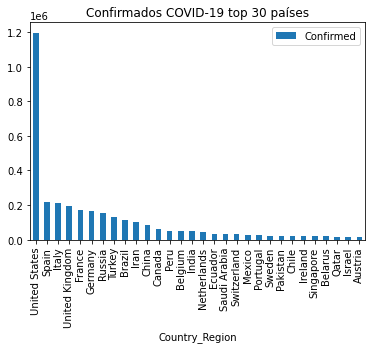

In [ ]:
reporte_covid19.sort_values(by='Confirmed', inplace=True, ascending=False)
top = 30
reporte_covid19.head(top).plot.bar(x='Country_Region', y='Confirmed', rot=90, title='Confirmados COVID-19 top '+str(top)+' países')
plt.show(block=True)

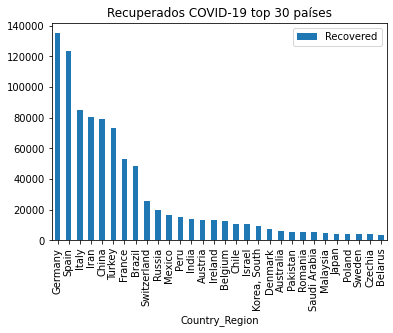

In [ ]:
reporte_covid19.sort_values(by='Recovered', inplace=True, ascending=False)
top = 30
reporte_covid19.head(top).plot.bar(x='Country_Region', y='Recovered', rot=90, title='Recuperados COVID-19 top '+str(top)+' países')
plt.show(block=True)

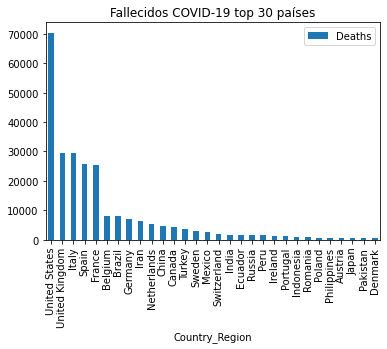

In [ ]:
reporte_covid19.sort_values(by='Deaths', inplace=True, ascending=False)
top = 30
reporte_covid19.head(top).plot.bar(x='Country_Region', y='Deaths', rot=90, title='Fallecidos COVID-19 top '+str(top)+' países')
plt.show(block=True)

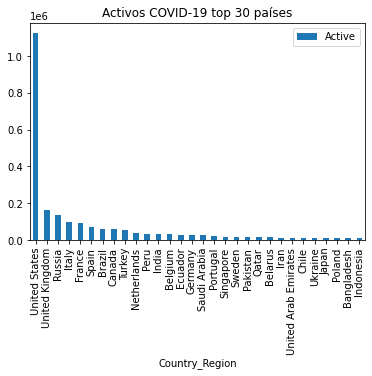

In [ ]:
reporte_covid19.sort_values(by='Active', inplace=True, ascending=False)
top = 30
reporte_covid19.head(top).plot.bar(x='Country_Region', y='Active', rot=90, title='Activos COVID-19 top '+str(top)+' países')
plt.show(block=True)

### Eliminación de columnas a no utilizar

In [ ]:
poblacion = poblacion.drop(['pop2019','Rank','area','GrowthRate'], axis = 1)
#reporte_covid19 = reporte_covid19.drop(['FIPS','Admin2','Province_State',
#                      'Last_Update', 'Combined_Key'], axis = 1)

### Unión de datasets

In [ ]:
#dataset = pd.merge(densidad_camas, poblacion, left_on='Country', right_on='país')
dataset = pd.merge(poblacion,densidad_camas, left_on='país', right_on='Country')
print(dataset.shape)
dataset = pd.merge(dataset, reporte_covid19, left_on='Country', right_on='Country_Region')
print(dataset.shape)
dataset = pd.merge(dataset, incomes, left_on='Country', right_on='CountryName')
print(dataset.shape)
dataset = dataset.drop(['Country_Region', 'país','CountryName'], axis=1)

(168, 5)
(158, 10)
(145, 12)


In [ ]:
print(dataset.shape)
dataset.head()
dataset.sort_values(by='Recovered', inplace=True, ascending=False)
dataset.head()

(145, 9)


,población,Density,Country,Hospital bed density,Confirmed,Deaths,Recovered,Active,GroupName
12,83783.942,233.8666,Germany,8.0,167007,6993,135100,24914,4
21,46754.778,92.3666,Spain,3.0,219329,25613,123486,70230,4
16,60461.826,200.9387,Italy,3.2,213013,29315,85231,98467,4
0,1439323.776,147.7068,China,4.3,83968,4637,78870,461,3
11,84339.067,106.4748,Turkey,2.8,129491,3520,73285,52686,3


Existe una disminución al unir los datasets por 'Country' debido a la manera de que están escritos. Esto se puede solucionar haciendo un fuzzy merge utilizando la librería FuzzyWuzzy de Python que utiliza la [distancia Levenshtein](https://en.wikipedia.org/wiki/Levenshtein_distance).

> In information theory, linguistics and computer science, the Levenshtein distance is a **string metric for measuring the difference between two sequences**. Informally, the Levenshtein distance between two words is the **minimum number of single-character edits (insertions, deletions or substitutions) required to change one word into the other**. 


- https://stackoverflow.com/questions/13636848/is-it-possible-to-do-fuzzy-match-merge-with-python-pandas

- https://towardsdatascience.com/how-to-do-fuzzy-matching-in-python-pandas-dataframe-6ce3025834a6

In [ ]:
dataset.describe()

,población,Density,Hospital bed density,Confirmed,Deaths,Recovered,Active,GroupName
count,1.450000e+02,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.419593e+04,355.010774,2.926897,14920.613793,1220.806897,5934.903448,7764.903448,2.841379
std,1.674567e+05,1740.791796,2.388463,38836.916764,4646.740392,19523.424969,20630.388388,1.058536
min,3.393100e+01,2.062000,0.100000,3.000000,0.000000,0.000000,0.000000,1.000000
25%,2.961167e+03,37.479700,1.300000,293.000000,6.000000,74.000000,75.000000,2.000000
50%,9.904607e+03,89.683500,2.300000,1488.000000,32.000000,470.000000,662.000000,3.000000
75%,3.125544e+04,200.938700,3.900000,9677.000000,215.000000,1924.000000,5586.000000,4.000000
max,1.439324e+06,19289.108900,13.800000,219329.000000,29501.000000,135100.000000,165816.000000,4.000000


Se normalizan los datos diviendo las columnas por el valor promedio de cada uno, esto para que los valores estén en rangos similares al ser ingresados a algún modelo.

In [ ]:
# normalización de las columnas por división

# z = (x - u) / s

'''
dataset["población"] = (dataset["población"] - dataset["población"].mean()) / dataset["población"].std()
dataset["Density"] = (dataset["Density"] - dataset["Density"].mean() ) / dataset["Density"].std()

dataset["Hospital bed density"] = (dataset["Hospital bed density"] - dataset["Hospital bed density"].mean() ) / dataset["Hospital bed density"].std()
dataset["Confirmed"] = (dataset["Confirmed"] - dataset["Confirmed"].mean() ) / dataset["Confirmed"].std()
dataset["Deaths"] = (dataset["Deaths"] - dataset["Deaths"].mean() ) / dataset["Deaths"].std()
dataset["Recovered"] = (dataset["Recovered"] - dataset["Recovered"].mean() ) / dataset["Recovered"].std()
dataset["Active"] = (dataset["Active"] - dataset["Active"].mean() ) / dataset["Active"].std()
'''

dataset["población"] = dataset["población"] / dataset["población"].mean()
dataset["Density"] = dataset["Density"] / dataset["Density"].mean()

dataset["Hospital bed density"] = dataset["Hospital bed density"] / dataset["Hospital bed density"].mean()
dataset["Confirmed"] = dataset["Confirmed"] / dataset["Confirmed"].mean()
dataset["Deaths"] = dataset["Deaths"] / dataset["Deaths"].mean()
dataset["Recovered"] = dataset["Recovered"] / dataset["Recovered"].mean()
dataset["Active"] = dataset["Active"] / dataset["Active"].mean()

dataset.head()

,población,Density,Country,Hospital bed density,Confirmed,Deaths,Recovered,Active,GroupName
12,1.895739,0.658759,Germany,2.733270,11.193038,5.728179,22.763639,3.208540,4
21,1.057898,0.260180,Spain,1.024976,14.699730,20.980386,20.806741,9.044543,4
16,1.368040,0.566007,Italy,1.093308,14.276423,24.012807,14.360975,12.681033,4
0,32.566883,0.416063,China,1.469133,5.627651,3.798308,13.289180,0.059370,3
11,1.908299,0.299920,Turkey,0.956645,8.678664,2.883339,12.348137,6.785146,3


In [ ]:
dataset.describe()

,población,Density,Hospital bed density,Confirmed,Deaths,Recovered,Active,GroupName
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.841379
std,3.788961,4.903490,0.816040,2.602903,3.806286,3.289594,2.656876,1.058536
min,0.000768,0.005808,0.034166,0.000201,0.000000,0.000000,0.000000,1.000000
25%,0.067001,0.105573,0.444156,0.019637,0.004915,0.012469,0.009659,2.000000
50%,0.224107,0.252622,0.785815,0.099728,0.026212,0.079193,0.085255,3.000000
75%,0.707202,0.566007,1.332469,0.648566,0.176113,0.324184,0.719391,4.000000
max,32.566883,54.333869,4.714892,14.699730,24.165165,22.763639,21.354548,4.000000


### Visualización del dataset

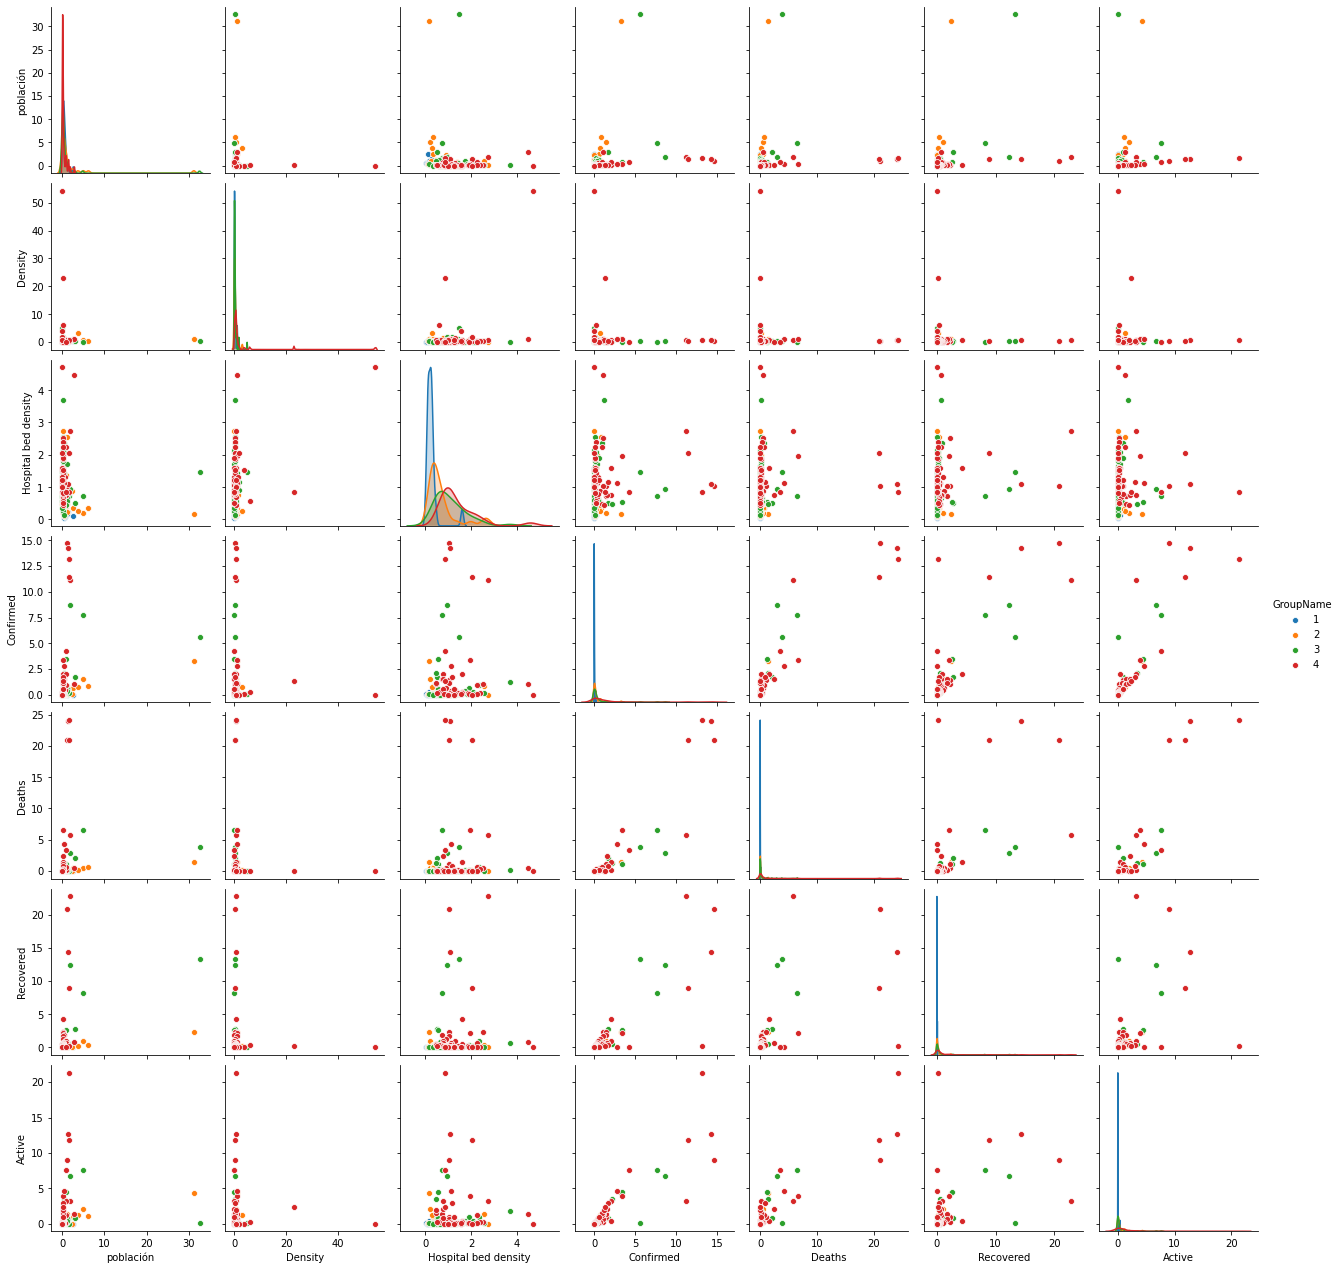

In [ ]:
sns.pairplot(dataset[["población", 	"Density" 	, "Hospital bed density" 	, "Confirmed"	, "Deaths" , "Recovered", "Active",'GroupName']], diag_kind="kde", hue='GroupName')
#dataset[["población","Density"]]

En los gráficos no se observa que las clases tenga una cierta separabilidad a primera vista, pero ayuda a percibir cierta correlación entre algunas clases.

### Correlación

Este varía en el intervalo [-1,1], estableciendo el signo el sentido de la relación, y la interpretación de cada resultado es el siguiente:

- Si **r = 1**: Correlación positiva perfecta. El índice refleja la dependencia total entre ambas dos variables, la que se denomina relación directa: **cuando una de las variables aumenta, la otra variable aumenta en proporción constante**.
- Si **0 < r < 1**: Refleja que se da una **correlación positiva**.
- Si **r = 0**: En este caso **no hay una relación lineal**. Aunque no significa que las variables sean independientes, ya que puede haber relaciones no lineales entre ambas variables.
- Si **-1 < r < 0**: Indica que existe una **correlación negativa**.
- Si **r = -1**: Indica una **correlación negativa perfecta y una dependencia total entre ambas variables** lo que se conoce como "relación inversa", que es **cuando una de las variables aumenta, la otra variable en cambio disminuye en proporción constante**.


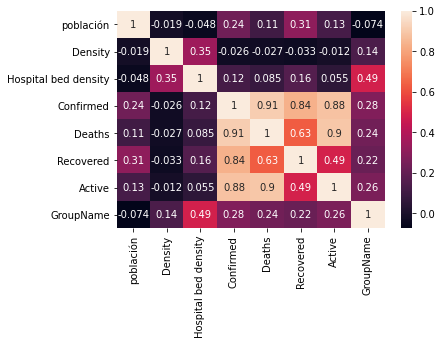

In [ ]:
corr = dataset.corr(method='pearson')
sns.heatmap(corr, annot=True)

- La **población** tiene una **correlación positiva** con los casos del **reporte COVID-19** (confirmados, muertos, recuperados, activos) y correlación negativa con la **densidad de camas de hospital**.
- La **densidad de población** tiene una **leve correlación negativa** con los casos del **reporte COVID-19** (confirmados, muertos, recuperados, activos).

- La **densidad camas hospital** presenta una **mayor correlación positiva** con los datos de **recuperados de COVID-19**.

## Elección de la tarea de Minería de Datos

La tarea que se realizará será clasificación ya que los países se encuentran clasificados según su ingreso por el dataset del Banco Mundial. Se pueden seleccionar algunas características para obtener el mejor modelo clasificador.

## Elección algoritmo de Minería de Datos

El algortimo a utilizar serán redes neuronales, con las cuales se variarán sus hiper-parámetros para encontrar el modelo con mejor desempeño.

## Minería de Datos

In [ ]:
dataset.head()

,población,Density,Country,Hospital bed density,Confirmed,Deaths,Recovered,Active,GroupName
12,1.895739,0.658759,Germany,2.733270,11.193038,5.728179,22.763639,3.208540,4
21,1.057898,0.260180,Spain,1.024976,14.699730,20.980386,20.806741,9.044543,4
16,1.368040,0.566007,Italy,1.093308,14.276423,24.012807,14.360975,12.681033,4
0,32.566883,0.416063,China,1.469133,5.627651,3.798308,13.289180,0.059370,3
11,1.908299,0.299920,Turkey,0.956645,8.678664,2.883339,12.348137,6.785146,3


In [ ]:
dataset.drop(['Active', 'Deaths'], axis = 1)
dataset.head()

,población,Density,Country,Hospital bed density,Confirmed,Recovered,GroupName
12,1.895739,0.658759,Germany,2.733270,11.193038,22.763639,4
21,1.057898,0.260180,Spain,1.024976,14.699730,20.806741,4
16,1.368040,0.566007,Italy,1.093308,14.276423,14.360975,4
0,32.566883,0.416063,China,1.469133,5.627651,13.289180,3
11,1.908299,0.299920,Turkey,0.956645,8.678664,12.348137,3
...,...,...,...,...,...,...,...
128,0.017459,0.055985,Bhutan,0.580820,0.000469,0.000842,2
137,0.004959,0.628395,Sao Tome and Principe,0.990811,0.011662,0.000674,2
126,0.019676,1.287212,Comoros,0.751649,0.000201,0.000000,2
30,0.853973,0.010554,Canada,0.854147,4.235818,0.000000,4


In [ ]:
one_hot_encoding = pd.get_dummies(dataset['GroupName'], prefix='GroupName') # no ayudo

Primero se separan los datos en features y labels

In [ ]:
data = dataset.drop(columns='Country', axis=1)
data = data.to_numpy()
size = np.shape(data)

X = data[:,:size[1]-1]
#y = one_hot_encoding.to_numpy()
y = data[:,size[1]-1:]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000)

### Optimización de Hiperparámetros

La optimización de hiperparámetros es un proceso iterativo que se encarga de encontrar las mejores configuraciones para el modelo.

Los hiperparáámetros a variar serán capas ocultas, función de activación, iniciación aleatoria de los pesos, función de optimización, factor tasa de aprendizaje y el método de tasa de aprendizaje.

Se realizará una búsqueda de malla para obtener el mejor modelo a partir de las combinaciones de las configuraciones dadas.

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [1,2,3,4,5],
    'activation': ['tanh', 'relu','sigmoid'],
    'random_state': [3,2,10,20],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'sigmoid'],
                         'alpha': [0.00

El mejor resultado de la mejor combinación de hiperparámetros fue:

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'constant', 'random_state': 3, 'solver': 'adam'}


Siendo su porcentaje de exactitud

In [ ]:
print('Score (Accuracy): ',clf.best_score_)

Score (Accuracy):  0.6033868092691622


In [ ]:
# Evaluacion del modelo
y_pred = clf.predict(X_test)
print('y_pred:')
print(y_pred)
print('y_test:')
print(y_test.T)

y_pred:
[3. 4. 4. 1. 3. 3. 2. 1. 3. 4. 4. 3. 3. 3. 3. 4. 1. 4. 3. 1. 4. 4. 2. 4.
 2. 4. 3. 1. 2. 4. 4. 1. 2. 3. 4. 4. 1. 4. 4. 4. 3. 1. 4. 4.]
y_test:
[[3. 3. 4. 1. 3. 3. 2. 2. 3. 4. 4. 2. 3. 4. 3. 4. 2. 4. 2. 1. 4. 4. 2. 3.
  2. 3. 1. 1. 3. 4. 4. 1. 2. 4. 3. 3. 1. 4. 4. 4. 3. 1. 3. 4.]]


La matriz de confusión del mejor modelo es presentado a continuación

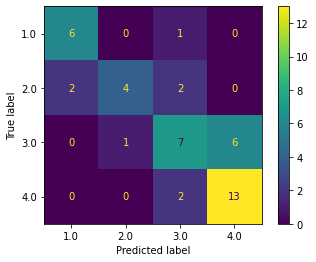

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

La matriz de confusión revela que aunque se tenga una exactitud cercana al 60% existen muchos errores en las prediciones, la clase 2 es la con mayores problemas al intentar clasificarla.

Todos los resultados de la búsqueda son presentados a continuación

In [ ]:
print('All scores:')
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

All scores:
0.395 (+/-0.114) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 1, 'learning_rate': 'constant', 'random_state': 3, 'solver': 'sgd'}
0.534 (+/-0.115) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 1, 'learning_rate': 'constant', 'random_state': 3, 'solver': 'adam'}
0.337 (+/-0.024) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 1, 'learning_rate': 'constant', 'random_state': 2, 'solver': 'sgd'}
0.415 (+/-0.087) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 1, 'learning_rate': 'constant', 'random_state': 2, 'solver': 'adam'}
0.445 (+/-0.117) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 1, 'learning_rate': 'constant', 'random_state': 10, 'solver': 'sgd'}
0.455 (+/-0.089) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 1, 'learning_rate': 'constant', 'random_state': 10, 'solver': 'adam'}
0.444 (+/-0.157) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_si

In [ ]:
len(means)

480